<a href="https://colab.research.google.com/github/Barbhuiya12/Machine-Learning_All/blob/main/Regression_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**
---
Polynomial Regression is a type of regression analysis used to model nonlinear relationships between the independent variable x and the dependent variable y. It's an extension of Simple Linear Regression.

In simple linear regression, we model the relationship between two variables using a straight line. But real-world data often has non-linear trends. Polynomial Regression is a method to handle such non-linearities by introducing higher-degree terms of the predictor variable.

In [1]:
from sympy import symbols, Eq

# Define the symbols
x = symbols('x')
beta = symbols('beta:4')  # Define 4 beta symbols for demonstration (up to cubic)

# Formulate the equations
equation_2nd_degree = Eq(beta[0] + beta[1]*x + beta[2]*x**2, 0)
equation_3rd_degree = Eq(beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3, 0)

equation_2nd_degree, equation_3rd_degree


(Eq(beta0 + beta1*x + beta2*x**2, 0),
 Eq(beta0 + beta1*x + beta2*x**2 + beta3*x**3, 0))

**Why use Polynomial Regression?**

>**Model Non-linear Data:** Real-world data often doesn't follow a straight line. It may follow a curve (either upward or downward). Polynomial regression allows us to curve-fit these data points.

>**Flexibility:** By changing the degree of the polynomial, we can change the amount of curvature in the fit, giving us flexibility in modeling various shapes of data trends.

**Degree of the Polynomial:**

The degree of the polynomial is a crucial parameter. It determines the complexity of the model:

>**Low Degree (e.g., Linear)**: Might be too simple to capture the data trend (underfitting).

>**High Degree**: Might capture not just the data trend but also the noise (overfitting). The model may become too complex, leading to erratic behaviors for predictions outside the known data points.

**Considerations & Challenges**
* Overfitting: One of the most significant challenges with Polynomial Regression is the risk of overfitting, especially with high-degree polynomials.
* Feature Scaling: Since polynomial terms can take very high or very low values, feature scaling becomes essential.
* Computational Complexity: As the degree of the polynomial increases, so does the computational cost.
* Multicollinearity: Higher-degree terms might be highly correlated, leading to multicollinearity, which can destabilize the model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score


In [4]:
# Loading the dataset
data = pd.read_csv('Position_Salaries.csv')
data.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Level'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Salary'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Level'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Salary'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Position'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_5, *[[['Level', 'Salary']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['Level', 'Position'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['Salary', 'Position'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Level', 'count()', 'Position'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Salary', 'count()', 'Position'], **{})
chart

In [5]:
# Splitting data into predictors and response
X = data.iloc[:, 1:2].values  # Keeping X as a matrix for plotting purposes
y = data.iloc[:, 2].values


In [6]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

In [7]:
# Transforming the original data to include polynomial features
poly_reg = PolynomialFeatures(degree=4)  # Degree 4 is chosen based on observation; can be adjusted
X_poly = poly_reg.fit_transform(X)

# Fitting a new Linear Regression model to the polynomial features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

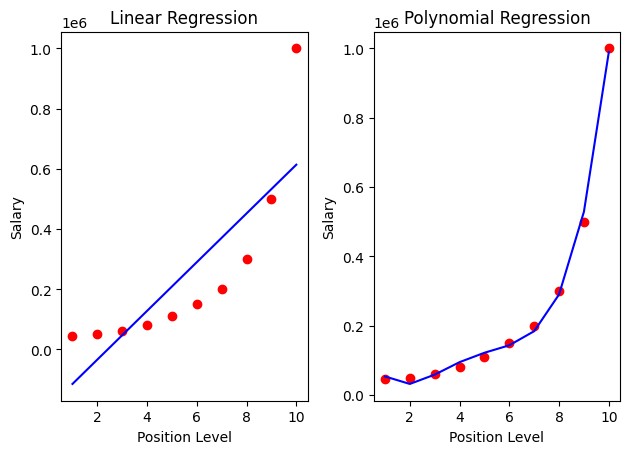

In [8]:
# Visualizing the Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Visualizing the Polynomial Regression results
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()


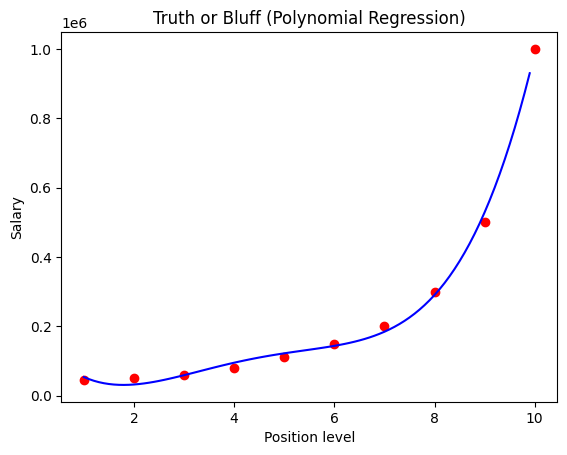

In [11]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting using the Polynomial Regression model
y_pred = lin_reg_2.predict(X_poly)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculating the R-squared (R^2) score
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 210343822.84
R-squared Score: 0.9974
